In [ ]:
import numpy as np
import matplotlib.pyplot as plt
i = complex(0,1) #We define i now.

In [2]:
#here we define the xn and yn recursive functions
def z3(xn,yn,a,b):
    xn_plus1 = np.real((xn+i*yn)**3+a+i*b)

    yn_plus1 = np.imag((xn+i*yn)**3+a+i*b)
    return(xn_plus1,yn_plus1)

The "find cutoff" function takes n,a,b. a and b values which make up $c = a+ib$. n is the maximum number of times the mandelbrot variant sequence is iterated. When the mandelbrot variant's absolute value is greater than 2, we can be certain that it will diverge, so we will "kill" the function by causing n_test to be greater than n, but not equal to n. If n_test is greater than n, the function will return the values of a and b, which can then be put in the scatterplot.

In [3]:
def find_cutoff(n,a,b):
    xn_new = 0
    yn_new = 0
    n_test = 0
    
    while n_test < n:
        if abs((xn_new+i*yn_new)**3+a+i*b) < 2:
            xn_new,yn_new = z3(xn_new,yn_new,a,b)
            n_test+=1
        else:
            n_test = n+1
            
    if n_test == n:
        return xn_new,yn_new,a,b
    if n_test != n:
        return 0,0,0,0

The "generate_mandel_plot" function takes a "threshhold, n, arange, and brange". arange and brange are the values over which a and b will be tested in the "find_cutoff" function. The values between -arange and +arange will be tested (same for brange). Threshold is the number of steps between -arange and +arange which are tested. Increasing the threshold value will increase the accurracy and density of the plot. n is, of course, just n which is put in the "find_cutoff" function.

In [4]:
def generate_mandel_plot(threshold, n, arange,brange):
    
    x_cutoffs = []
    y_cutoffs = []
    
    a_array = []
    b_array = []
    
    for an in np.linspace(-arange,arange,threshold):
        for bn in np.linspace(-brange,brange,threshold):
            xn_cutoff, yn_cutoff, a,b = find_cutoff(n,an,bn)
            
            a_array.append(a)
            b_array.append(b)
            
    return(a_array,b_array)

In [5]:
xpoints,ypoints = generate_mandel_plot(5000,100,10,10)

Text(0, 0.5, 'Imaginary')

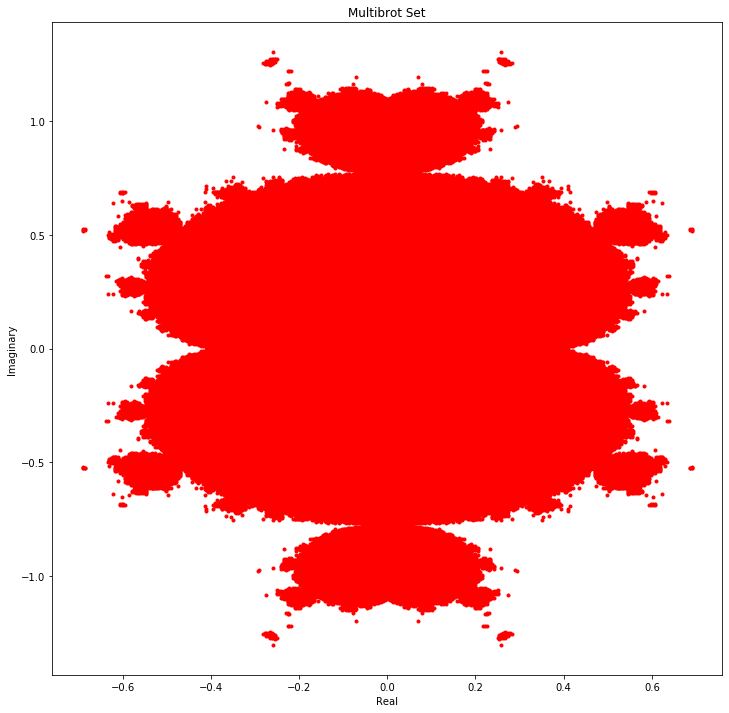

In [6]:

plt.figure(figsize = (12,12))

plt.plot(xpoints,ypoints,"r.")
plt.title("Multibrot Set")
plt.xlabel("Real")
plt.ylabel("Imaginary")

In [7]:
def z2(xn,yn):
    xn_plus1 = np.real((xn+i*yn)**2-0.83+i*0.2) #note that a and b are 
                                                #constant in this function
    yn_plus1 = np.imag((xn+i*yn)**2-0.83+i*0.2)
    return(xn_plus1,yn_plus1)

The "find_cutoff_z2" function takes an initial x0 and y0 value, which is then iterated n times. If the z2 sequence is found to diverge after being iterated n times, it returns nothing (because we do not want to plot those values). If the sequence can be iterated n times without diverging (going past 2) the function will return the initial values of x0,y0.

In [11]:
def find_cutoff_z2(xn_new_initial,yn_new_initial,n):
    xn_new = xn_new_initial
    yn_new = yn_new_initial
    n_test = 0
    
    while n_test < n:
        if abs((xn_new+i*yn_new)**2-0.83+i*0.2) < 2:
            xn_new,yn_new = z2(xn_new,yn_new)
            n_test+=1
        else:
            n_test = n+1
            
    if n_test == n:
        return xn_new_initial,yn_new_initial
    if n_test != n:
        return 0,0

In [12]:
def generate_julia_set(threshold, n, x_initial_range,y_initial_range):
    
    x_cutoffs = []
    y_cutoffs = []

    
    for xn in np.linspace(-x_initial_range,x_initial_range,threshold):
        for yn in np.linspace(-y_initial_range,y_initial_range,threshold):
            xn_cutoff, yn_cutoff = find_cutoff_z2(xn,yn,n)
            
            x_cutoffs.append(xn_cutoff)
            y_cutoffs.append(yn_cutoff)
            
    return(x_cutoffs,y_cutoffs)

In [18]:
xpoints,ypoints = generate_julia_set(3000,100,3,3)

Text(0, 0.5, 'Imaginary')

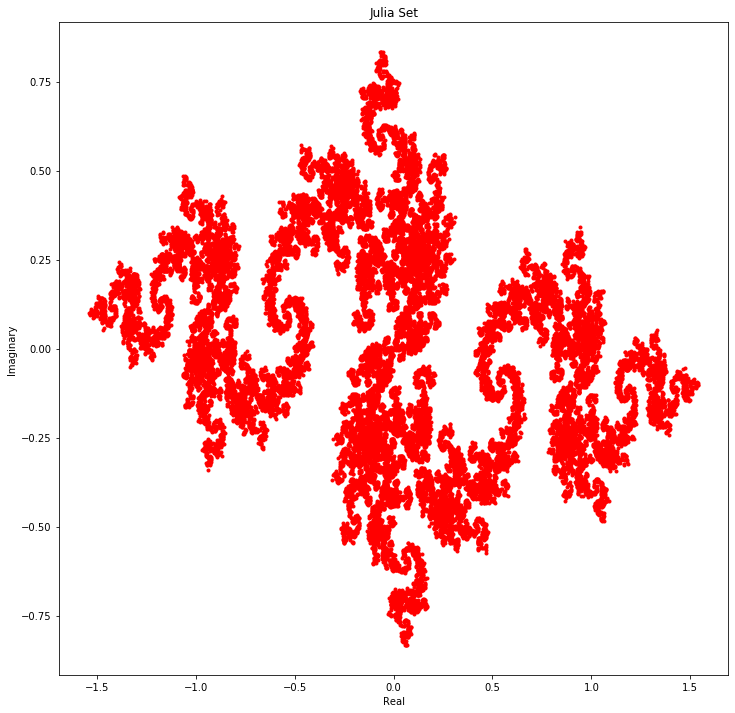

In [19]:
plt.figure(figsize = (12,12))

plt.plot(xpoints,ypoints,"r.")
plt.title("Julia Set")
plt.xlabel("Real")
plt.ylabel("Imaginary")